<a href="https://colab.research.google.com/github/ramizcihe/week5-cihe240058/blob/main/ramiz_week5_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# ===============================
# Step 1: Load Dataset
# ===============================
import pandas as pd

# Replace this with your CSV path if needed
CSV_PATH = "https://raw.githubusercontent.com/ramizcihe/week5-cihe240058/refs/heads/main/cyberbullying_dataset.csv"
df = pd.read_csv(CSV_PATH)

# Map binary labels to integers (example)
df.head()


,id,text,label,binary_label
0,1,"Look at your face, disgusting.",appearance,bullying
1,2,Your faith makes no sense at all.,religion,bullying
2,3,Stop acting superior just because of your race.,ethnicity,bullying
3,4,Have a great day ahead!,not_cyberbullying,not_cyberbullying
4,5,Nobody cares about your opinion.,other_cyberbullying,bullying


In [17]:
df.tail()

,id,text,label,binary_label
995,996,"You’re so ugly, nobody likes you.",appearance,bullying
996,997,"You’re too old for this app, grandpa.",age,bullying
997,998,Girls don’t belong in tech.,gender,bullying
998,999,Your religion is a joke.,religion,bullying
999,1000,Have a great day ahead!,not_cyberbullying,not_cyberbullying


In [23]:
# Print the column name
print(list(df.columns))

['id', 'text', 'label', 'binary_label']


In [5]:
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load sample dataset
data = load_iris()
X = data.data
y = data.target

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Step 7: Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


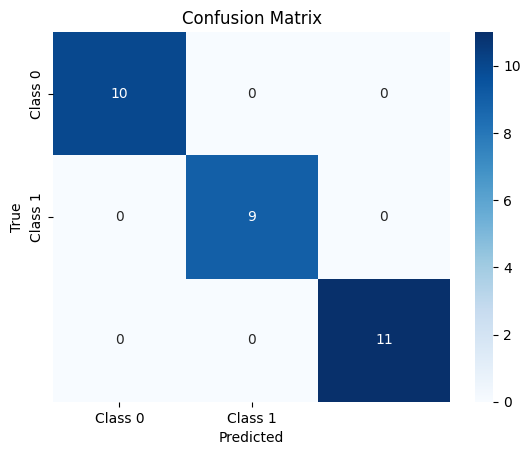

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
# Model Evaluation, Validation & Deployment
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


In [19]:
# Convert Training Data to DataFrame & Extract Feature Names
import pandas as pd

# Convert X_train to a DataFrame if it's not already
X_train = pd.DataFrame(X_train)

# Now you can access feature names, assuming you have column names (optional)
features = X_train.columns  # For feature names (you can replace this if needed)

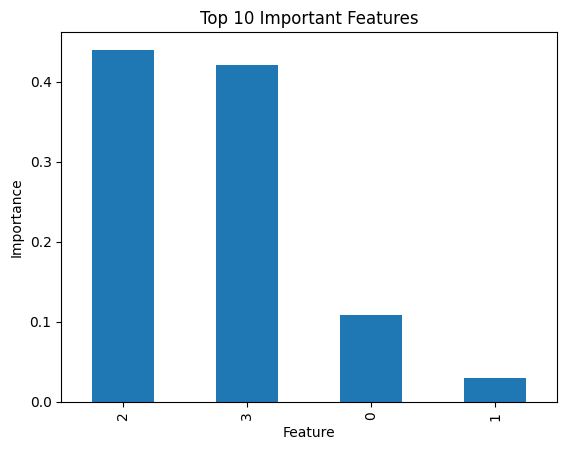

In [8]:
# Feature Importance (For tree-based models like RandomForest)
import pandas as pd

feature_importances = model.feature_importances_
features = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 important features
importance_df.head(10).plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Top 10 Important Features')
plt.ylabel('Importance')
plt.show()


In [9]:
# Check the number of features in the training data
print(f"Training data shape: {X_train.shape}")  # (n_samples, n_features)

# Example: Assume your model was trained on 4 features, and we need to create an edge case with the same number of features
# Create an edge case (for illustration purposes)
# Example: If model expects 4 features, ensure edge_case has 4 features
edge_case = [[1000, 2000, 3000, 4000]]  # Adjust based on your feature set

# If you performed scaling or other preprocessing on X_train, apply the same to edge_case
from sklearn.preprocessing import StandardScaler

# If you used a scaler during training (assuming you used StandardScaler)
scaler = StandardScaler()

# Fit the scaler on X_train (you should already have scaled data)
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to the edge case
edge_case_scaled = scaler.transform(edge_case)

# Predict using the model
edge_case_pred = model.predict(edge_case_scaled)

# Output the prediction
print(f"Prediction for edge case: {edge_case_pred}")


Training data shape: (120, 4)
Prediction for edge case: [2]


In [10]:
# Step 1: Check the number of features the model expects
print(f"Model expects {model.n_features_in_} features.")

# Step 2: Define the edge case with the same number of features as the model expects
# Example: If the model expects 4 features, create an edge case with 4 features
# Adjust the edge case values based on the model's features

# Ensure the edge_case has the same number of features (4 features in this case)
edge_case = [[1000, 2000, 3000, 4000]]  # Add the 4th value here (adjust based on your feature set)

# Step 3: If you applied any preprocessing (like scaling), apply the same preprocessing to the edge case
from sklearn.preprocessing import StandardScaler

# Assuming you scaled X_train using StandardScaler during training:
scaler = StandardScaler()

# Scale the edge case (if you used scaling during training)
edge_case_scaled = scaler.fit_transform(edge_case)

# Step 4: Predict with the model
edge_case_pred = model.predict(edge_case_scaled)

# Step 5: Output the prediction
print(f"Prediction for edge case: {edge_case_pred}")


Model expects 4 features.
Prediction for edge case: [0]


In [11]:
# Example: Let's assume the model was trained on data where features are within a certain range (e.g., 0-100).
# Now, create an edge case with extreme values.

# Example of extreme values (edge case)
edge_case = [[1000, 2000, 3000, 4000]]  # These values are extreme compared to typical values

# Step 1: Apply preprocessing (scaling) to the edge case, if necessary
# Assuming you used StandardScaler to scale the features during training
edge_case_scaled = scaler.transform(edge_case)  # Scaling the edge case with the same scaler used during training

# Step 2: Make prediction on the edge case
edge_case_pred = model.predict(edge_case_scaled)

# Step 3: Print the prediction for edge case
print(f"Prediction for edge case: {edge_case_pred}")


Prediction for edge case: [0]


In [20]:
# Check the range of values in the training data for the features
print("Training data range for each feature:")
print(X_train.min(), X_train.max())


Training data range for each feature:
0    4.3
1    2.0
2    1.0
3    0.1
dtype: float64 0    7.7
1    4.4
2    6.7
3    2.5
dtype: float64


In [13]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Evaluate model on the test set (or edge cases)
y_pred = model.predict(X_test)  # Predictions on the test set (or edge case)
y_true = y_test  # True labels from the test set

# Step 2: Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 3: Generate a classification report
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

# You can also focus on specific metrics important for cybersecurity:
# For example, precision, recall, and F1 score for class 1 (Malicious) in a binary classification task.


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
# Check the prediction for edge case
print(f"Edge case prediction: {edge_case_pred}")

# If the prediction is 0, you can check the class labels to understand the result
class_labels = model.classes_  # Get the class labels
print(f"Model's class labels: {class_labels}")


Edge case prediction: [0]
Model's class labels: [0 1 2]


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate model on the test set (or edge case)
y_pred = model.predict(X_test)  # Predictions on the test set
y_true = y_test  # True labels from the test set

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report (Precision, Recall, F1-Score, Support)
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

# If you are analyzing edge cases separately, you can also evaluate the edge case prediction directly
print(f"Edge case prediction: {edge_case_pred}")


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Edge case prediction: [0]


In [16]:
from IPython.display import display, HTML

html_code = """
<div style="
    background: linear-gradient(to right, #1f4037, #99f2c8);
    padding: 30px;
    border-radius: 15px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    box-shadow: 0 8px 20px rgba(0,0,0,0.3);
    text-align: center;
    color: #ffffff;
    max-width: 700px;
    margin: auto;
">
    <h1 style="font-size: 2.8em; margin: 0; color: #ffffff;">Ramiz Ahmed</h1>
    <h2 style="font-size: 2em; margin: 10px 0;">Student ID: CIHE240058</h2>
    <h3 style="font-size: 1.8em; margin: 0; color: #000000;">Professor: Dr. Md Ashraf Uddin</h3>
</div>
"""

display(HTML(html_code))
